In [1]:
# import libraries for working with arrays and DataFrames
import numpy as np
import pandas as pd
# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import functions for retrieving and cleaning telco dataset
import prepare

In [2]:
# retrieve data from sql database, and clean the data
df = prepare.wrangle()

opening data from file


In [3]:
# split data into train, validate, test groups
train, validate, test = prepare.split_data(df)

In [4]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check,neither_security_or_backup
1843,2676-ISHSF,Male,0,0,0,1,1,No,No internet service,No internet service,...,1,0,0,0,0,1,0,0,1,False
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,0,1,0,0,0,1,0,0,False
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,0,1,0,1,1,0,1,0,0,False
5210,7328-OWMOM,Female,0,0,1,31,1,No,No internet service,No internet service,...,1,0,1,0,0,1,1,0,0,False
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,0,1,0,0,1,0,False


In [5]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_male', 'multiple_lines_no_phone_service',
       'multiple_lines_yes', 'online_security_no_internet_service',
       'online_security_yes', 'online_backup_no_internet_service',
       'online_backup_yes', 'device_protection_no_internet_service',
       'device_protection_yes', 'tech_support_no_internet_service',
       'tech_support_yes', 'streaming_tv_no_internet_service',
       'streaming_tv_yes', 'streaming_movies_no_internet_service',
       'streaming_movies_yes', 'contract_type_one_year',
       'contract_type_two_year', 'internet_service_type_fiber_optic',
       'internet_service_type_non

What percentage of customers will churn?

In [6]:
def get_pie_total():
    '''This function will display a pie chart of the total customer churn rate'''
    # create the pie chart
    plt.pie(train.churn.value_counts(), labels=("Didn't churn",'Churned'), 
            autopct='%1.1f%%', colors=('cornflowerblue', 'red'), startangle=90)
    # give the pie chart a title
    plt.title('About 26.5% of Customers Will Churn')
    # display the pie chart
    plt.show()

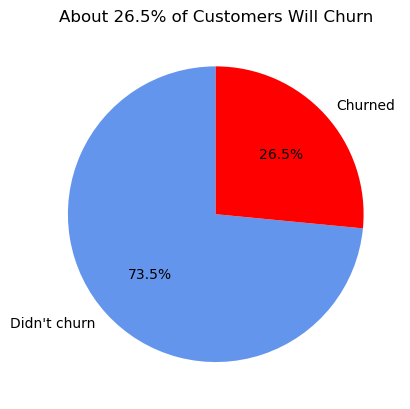

In [7]:
get_pie_total()

- Do customers with both phone services and internet service churn less than average?
- Do customers with multiple phone lines churn less than customers with phone service on average?
- Do customers churn less with online security and online backup services than customers without?
- Do customers with device protection and tech support churn less than customers without?
- Does paperless billing have an effect on customer churn rate?
- Do customers with streaming tv have a lower churn rate than those without?
- Do customers with streaming movies have a lower churn rate than those without?
- Do customers with both streaming tv and streaming movies churn at a lower rate than customers on average?
- Is there a difference in churn among genders depending on if they have streaming tv or movie streaming?
- Does payment type have an effect on churn?
- Does contract type have an effect on churn?

In [8]:
# Do customers with both phone services and internet service churn less than 
# customers that only have one service?

# create a variable to group customers with both service types
train['phone_and_internet'] = ((train.phone_service == 1) 
                               & (train.internet_service_type_none == 0))

def get_bar_phone_and_internet():
    '''
    This function will display a barplot of customer churn rates for customers
    who have one service type and customers who have both service types.
    '''
    # create the bar plot
    sns.barplot(data=train,
               x='phone_and_internet',
               y='churn',
               ci=False,
               )
    # change the tick labels to something understandable
    plt.xticks(ticks=(False, True), labels=('One Service','Phone & Internet'))
    # add axis labels
    plt.xlabel('Customer Service Subscriptions')
    plt.ylabel('Customer Churn Rate')
    # add a chart title
    plt.title('Customers With Both Phone and Internet Services Have a \n\
    Higher Churn Rate Than Customers With Only One Service Type')
    # add a line showing the average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Average Churn')
    # create a legend to describe the avg churn rate line
    plt.legend()
    # show the chart
    plt.show()

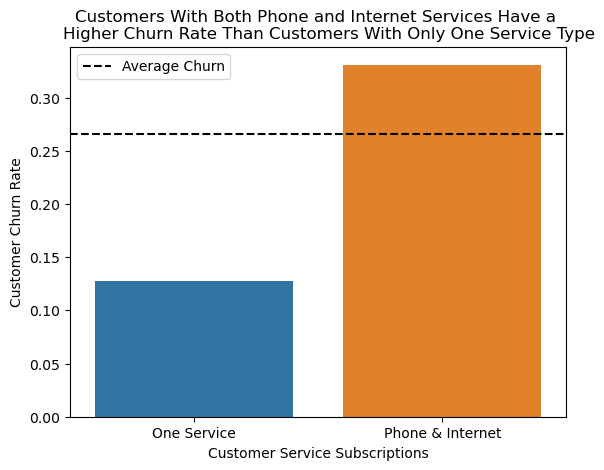

In [9]:
get_bar_phone_and_internet()

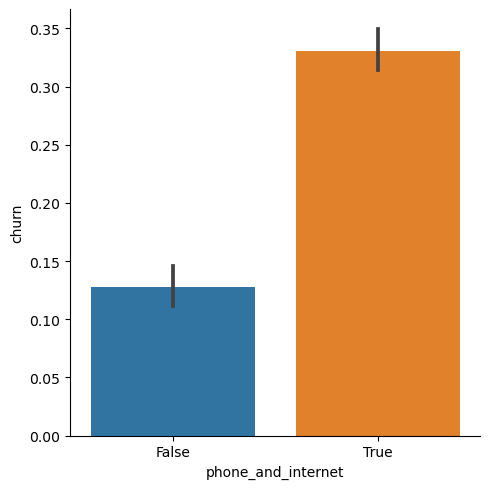

In [10]:
sns.catplot(kind='bar',
           data=train,
           x='phone_and_internet',
           y='churn')

customers with phone and internet service appear to churn at a rate around 20% higher than customers with only one service.

In [11]:
internet = train[train.internet_service_type_none == 0]

In [12]:
internet

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check,neither_security_or_backup,phone_and_internet
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,1,0,0,0,1,0,0,False,True
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,0,1,1,0,1,0,0,False,True
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,1,0,0,1,0,False,True
2350,3370-GQEAL,Male,0,1,1,30,1,Yes,No,No,...,0,0,0,1,0,0,1,0,True,True
2393,3422-LYEPQ,Male,0,1,1,1,1,No,No,No,...,0,0,0,1,0,0,1,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,5839-SUYVZ,Male,0,0,0,16,1,No,No,No,...,0,0,0,1,0,1,0,0,True,True
731,1078-TDCRN,Female,1,1,0,3,0,No phone service,No,Yes,...,0,0,0,0,0,0,1,0,False,False
2272,3249-VHRIP,Female,0,0,0,62,0,No phone service,No,Yes,...,1,0,1,0,0,1,0,0,False,False
6629,9419-IPPBE,Female,0,1,1,51,1,Yes,No,No,...,1,1,0,1,0,0,1,0,True,True


# Do customers without online security or online backup have a higher churn rate than customers with at least one of these services?

H$_0$ : customers with neither online security or backup churn rate is <= than customers with one or both of these services

H$_a$ : customers with neither online security or backup churn rate is > than customers with one or both of these services

$\alpha$: 0.05   

In [13]:
train['neither_security_or_backup'] = ((train.online_backup == 'No') 
                                   & (train.online_security == 'No'))

In [14]:
def get_bar_security_or_backup():
    ''' 
    This function will display a bar plot showing the churn rate of customers 
    who have security or backup services and customers who have neither service
    '''
    # create a bar plot
    sns.barplot(data=train,
                x='neither_security_or_backup',
                y='churn',
                ci=False)
    # create a line showing the total average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Total Average Churn')
    # display a legend describing the average churn line
    plt.legend()
    # change the axis labels
    plt.ylabel('Customer Churn Rate')
    plt.xlabel('Security or Backup Subscription')
    # change the description for each bar
    plt.xticks(ticks=(False, True), labels=('Has At Least One Service',
                                            'Has Neither Service'))
    # add a title for the chart
    plt.title('Customers With Neither Internet Security or Online Backup Services\n\
    Have a Higher Churn Rate Than Customers With At Least One Service')
    plt.show()

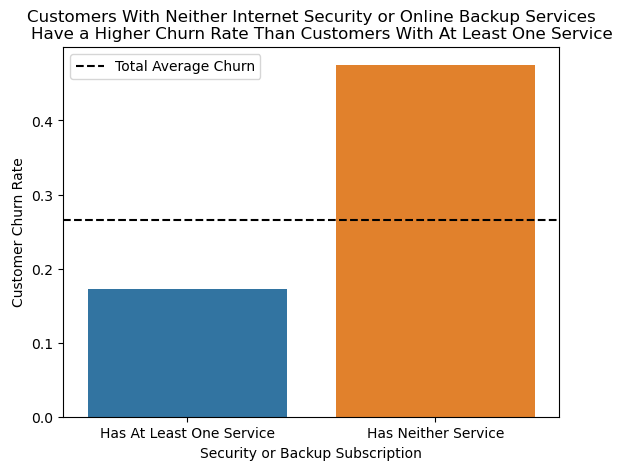

In [15]:
get_bar_security_or_backup()

The p-value of the variance test is less than our alpha. Therefore we have evidence that the variances are not equal.

In [16]:
internet = train[train.internet_service_type_none == 0]
mask = ((internet.online_backup == 'No') & (internet.online_security == 'No'))

In [17]:
# check if variances are equal
# h_0: variances are equal
# h_a: variances are not equal
# alpha: 0.05
nsob_churn = train[train['neither_security_or_backup']].churn
stats.levene(internet[mask].churn, internet[~mask].churn)

LeveneResult(statistic=237.84503845862395, pvalue=9.806436504108044e-52)

In [18]:
internet[~mask]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check,neither_security_or_backup,phone_and_internet
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,1,0,0,0,1,0,0,False,True
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,0,1,1,0,1,0,0,False,True
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,1,0,0,1,0,False,True
2037,2931-SVLTV,Male,0,1,1,40,1,Yes,Yes,Yes,...,1,0,0,1,0,1,0,0,False,True
5236,7377-DMMRI,Male,0,0,0,2,1,No,Yes,No,...,0,0,0,0,0,0,1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,6695-AMZUF,Female,0,1,0,70,1,No,Yes,Yes,...,1,0,1,0,0,1,0,0,False,True
3009,4307-KTUMW,Male,0,1,0,53,1,Yes,Yes,No,...,1,0,0,1,0,0,1,0,False,True
731,1078-TDCRN,Female,1,1,0,3,0,No phone service,No,Yes,...,0,0,0,0,0,0,1,0,False,False
2272,3249-VHRIP,Female,0,0,0,62,0,No phone service,No,Yes,...,1,0,1,0,0,1,0,0,False,False


In [19]:
def get_ttest_neither_security_or_backup():
    '''
    This function will perform a t-test on the sample of customers who do not have either
    online security or backup services, compared to the churn rate of all customers
    '''
    # set the alpha score
    alpha = 0.05
    # get a subset of customers who have internet service
    internet = train[train.internet_service_type_none == 0]
    # get the churn rate of customer subsets that we are looking at
    mask = ((internet.online_backup == 'No') & (internet.online_security == 'No'))
    # run the t-test on our 2 subsets
    t_stat, p = stats.ttest_ind(internet[mask].churn, 
                                internet[~mask].churn, equal_var=False)
    # a t-stat > 0 and p / 2 < alpha will indicate that having neither security
    # or backup services has a higher churn rate than customers with at least one service
    print(f'T_stat is greater than 0: {t_stat > 0}, T_stat = {t_stat:.6}')
    print(f'p-value / 2 is less than alpha: {p / 2 < alpha}, p-value / 2 = {p/2:.6}')

In [20]:
get_ttest_neither_security_or_backup()

T_stat is greater than 0: True, T_stat = 14.8396
p-value / 2 is less than alpha: True, p-value / 2 = 6.67359e-48


In [21]:
train[train['neither_security_or_backup']].churn.mean() - train.churn.mean()

0.21000805966070873

## 3. Do customers with tech support service have a lower churn rate than customers on average?

In [87]:
def get_bar_tech_support():
    '''
    This function will display a bar graph of the churn rate of customers who have tech
    support service and customers who do not.
    '''
    # create the bar chart
    sns.barplot(data=train,
                x='tech_support_yes',
                y='churn',
                ci=False)
    # change the xtick labels to understandable text
    plt.xticks(ticks=(0,1), labels=('No Tech Support', 'Has Tech Support Ticket'))
    # create x and y axis labels
    plt.xlabel('Customers With or Without Tech Support Ticket')
    plt.ylabel('Customer Churn Rate')
    # create a chart title
    plt.title('Customers With Tech Support Tickets Have a Lower Churn Rate\n\
    Than Customers That Haven\'t Contacted Tech Support')
    # create a line showing the overall average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Total Average Churn')
    # add a legend describing the average churn rate line
    plt.legend()
    # show the chart
    plt.show()

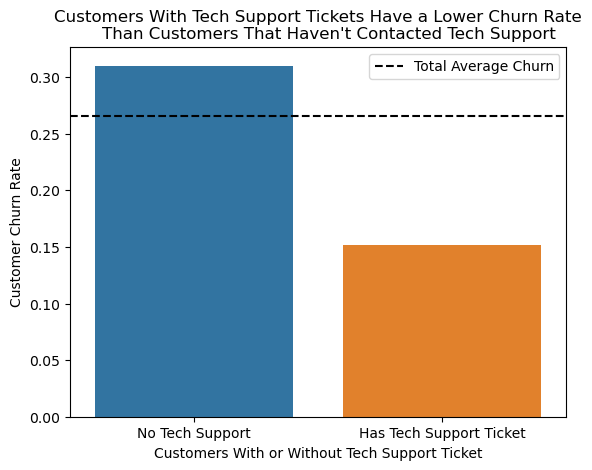

In [88]:
get_bar_tech_support()

# Do customers with tech support service have a lower churn rate than customers without it?

H$_0$ : Customers with tech support have a churn rate >= than customers without it

H$_a$ : Customers with tech support have a churn rate < than customers without it

$\alpha$: 0.05   

In [24]:
def get_ttest_tech_support():
    '''
    This function will perform a t-test on the sample of customers who have tech support
    compared to the churn rate of all customers.
    '''
    # set the alpha score
    alpha = 0.05
    # get the churn rate of customer subset that we are looking at
    tech_churn = train[train['tech_support_yes'] == 1].churn
    # run the t-test on our sample compared to the total churn rate
    t_stat, p = stats.ttest_ind(tech_churn, 
                                train.churn, equal_var=False)
    # a t-stat < 0 and p / 2 < alpha will indicate that customers with tech support service
    # have a lower churn rate than customers without it
    print(f'T_stat is less than 0: {t_stat < 0}, T_stat = {t_stat:.6}')
    print(f'p-value / 2 is less than alpha: {p / 2 < alpha}, p-value / 2 = {p/2:.6}')

In [25]:
get_ttest_tech_support()

T_stat is less than 0: True, T_stat = -8.83338
p-value / 2 is less than alpha: True, p-value / 2 = 1.02531e-18


In [72]:
internet.churn.mean() - internet[internet['tech_support_yes'] == 1].churn.mean()

0.16877167858450182

In [27]:
# Does paperless billing have an effect on customer churn rate?
pd.crosstab(train.paperless_billing, train.churn)

churn,0,1
paperless_billing,,
0,1357,256
1,1540,790


In [28]:
stats.chi2_contingency(pd.crosstab(train.paperless_billing, train.churn))

(158.13079744599034,
 2.897751597290523e-36,
 1,
 array([[1185.10296728,  427.89703272],
        [1711.89703272,  618.10296728]]))

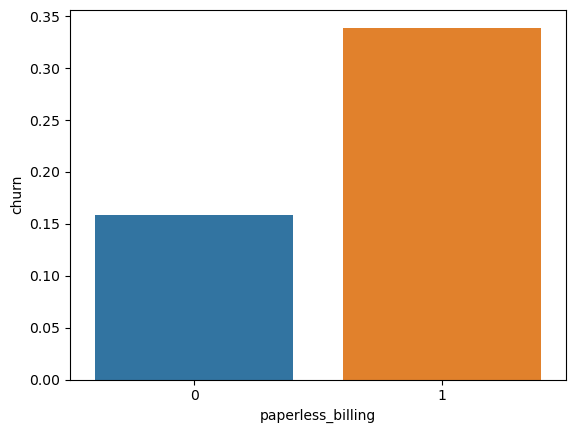

In [29]:
sns.barplot(data=train,
           x='paperless_billing',
           y='churn',
           ci=False)
plt.show()

In [30]:
# Do customers with both streaming tv and streaming movies churn at a 
# lower rate than customers on average?

In [31]:
def get_bar_dependents():
    '''
    This function will display a visualization for customer churn rate based on if
    the customer has dependents or not.
    '''
    # Does a customer having dependents change the rate of customer churn?
    # create the bar graph
    sns.barplot(data=train,
                x='dependents',
                y='churn',
                ci=False)
    # change the xticks to something understandable
    plt.xticks(ticks=(0,1), labels=('No Dependents', 'Has Dependents'))
    # change the axis labels
    plt.xlabel('Customer Dependents')
    plt.ylabel('Customer Churn Rate')
    # create a title for the graph
    plt.title('Customers With Dependents Have a Lower Churn Rate')
    # create a line showing the total average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Total Average Churn')
    # create a legend explaining the avg churn rate line
    plt.legend()
    # show the graph
    plt.show()

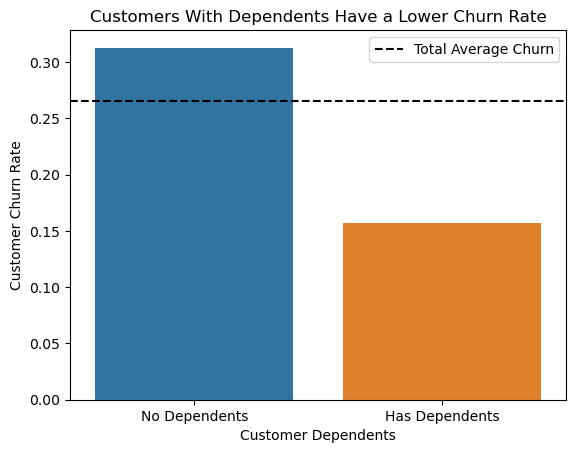

In [32]:
get_bar_dependents()

In [33]:
train.churn.mean() - train[train['dependents'] == 1].churn.mean()

0.10804230669739293

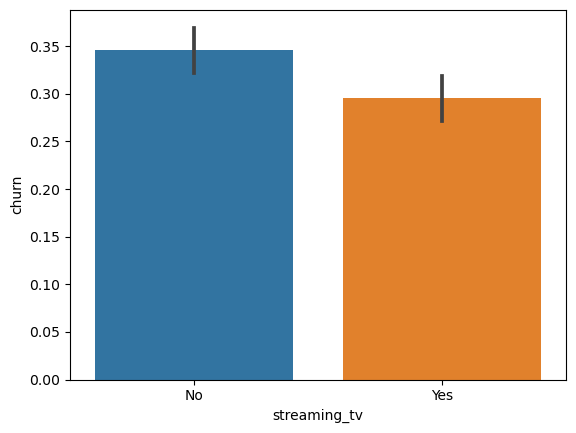

In [34]:
# Do customers with streaming tv have a lower churn rate than those without?
sns.barplot(data=internet,
                x='streaming_tv',
                y='churn')
plt.show()

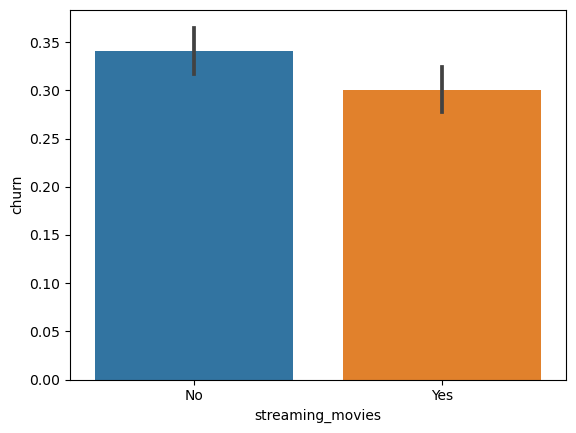

In [35]:
# Do customers with streaming movies have a lower churn rate than those without?
sns.barplot(data=internet,
                x='streaming_movies',
                y='churn')
plt.show()

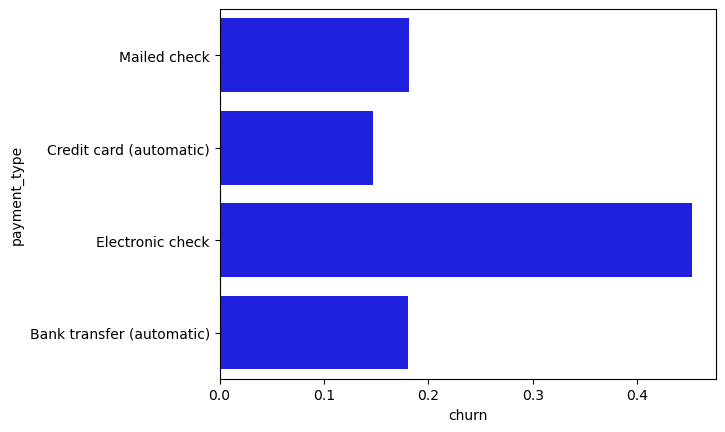

In [36]:
# does payment method affect churn rate?
sns.barplot(data=train,
           y='payment_type', color=('blue'),
           x='churn',
           ci=False)
plt.show()

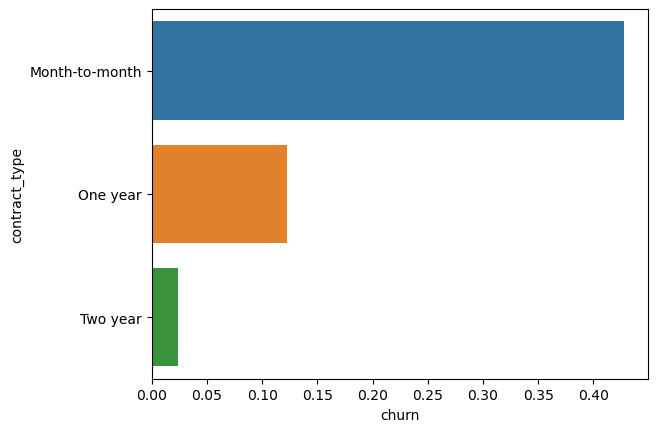

In [37]:
# Does contract type affect churn rate?
sns.barplot(data=train,
           x='churn',
           y='contract_type',
           ci=False)
plt.show()

In [77]:
no_service = ((internet.online_backup == 'No') &
                          (internet.online_security == 'No') &
                         (internet.device_protection == 'No'))
no_service

5717    False
1083    False
2475    False
2350     True
2393     True
        ...  
4128     True
731     False
2272    False
6629    False
5563    False
Length: 3059, dtype: bool

In [82]:
internet[no_service == True].churn.mean()

0.5190023752969121

In [78]:
internet[no_service == True].churn.mean() - internet[no_service == False].churn.mean()

0.27362574020444475

In [79]:
internet[no_service == False].churn.mean() 

0.2453766350924673

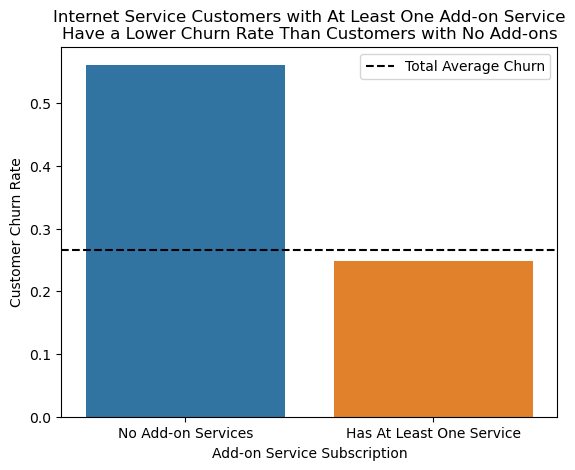

In [80]:
# create a bar plot
sns.barplot(data=internet,
            x='no_service',
            y='churn',
            ci=False, order=[1,0])
# create a line showing the total average churn rate
plt.axhline(train.churn.mean(), ls='--', color='black', label='Total Average Churn')
# display a legend describing the average churn line
plt.legend()
# change the axis labels
plt.ylabel('Customer Churn Rate')
plt.xlabel('Add-on Service Subscription')
# change the description for each bar
plt.xticks(ticks=(False, True), labels=('No Add-on Services',
                                        'Has At Least One Service'))
# add a title for the chart
plt.title('Internet Service Customers with At Least One Add-on Service\n\
Have a Lower Churn Rate Than Customers with No Add-ons')
plt.show()